# Tema 2. Anàlisi de seqüències

## Anàlisi de qualitat de seqüències curtes

Les seqüències curtes que utilitzarem en esta pràctica provenen d'un experiment de seqüenciació d'un aïllat de coronavirus. Es troben als arxius `data/ERR4423464_1.fastq` i `data/ERR4423464_2.fastq`, que són arxius de text amb format **fastq**. Hi ha dos perquè es tracta de lectures aparellades (*paired end*): cada fragment original de ADN ha sigut sequenciat primer des d'un extrem i després des de l'altre. Les dues lectures poden arribar a solapar-se, si el fragment original no era massa llarg. Primer, dóna-li una ullada a l'arxiu. Hauries de poder observar alguna cosa així:

    @ERR4423464.1 M00289:305:000000000-J7B3T:1:1101:18085:1894 length=109
    CTGCTACACGCTGCGAAGCTCCCAATTTGTAATAAGAAAGCGTTCGTGATGTAGCAACAGTGATTTCTTTAGGC...
    +ERR4423464.1 M00289:305:000000000-J7B3T:1:1101:18085:1894 length=109
    BC@CCDE9F-@C7C+++6@CEFF8,CFFCFA9F9,,,,,,C:FFFCF@,C9F99C,6C8<C9,EFFFFEE9,,9...


Pots aprendre més sobre el format **fastq** [aquí](https://en.wikipedia.org/wiki/FASTQ_format). Pots identificar les diferents parts del format? Per a què serveix la quarta línia de cada registre?

A continuació utilitzarem el paquet *ShortReads* de R per comprovar la qualitat i característiques de les seqüències. Aquest paquet ha estat creat per Martin Morgan, Michael Lawrence i Simon Anders, i és distribuït amb llicència *Artistic-2.0* en [Bioconductor](http://www.bioconductor.org/packages/release/bioc/html/ShortRead.html).

Recorda que per executar el codi mostrat a continuació (o aquell que tu escrigues) has de seleccionar el bloc de codi i fer clic al botó *Run*, al menú de la capçalera. El codi està distribuït en diferents blocs per facilitar la comprensió de cada pas.

In [1]:
# Per poder utilitzar funcions d'anàlisi de seqüències curtes
# cal carregar algun paquet específic, com ara "ShortReads":
suppressMessages(library('ShortRead', logical.return = TRUE))

# library('ShortRead')  # faria el mateix, però amb un llarg missatge.

[1] TRUE

In [2]:
# La funció qa() aplica una anàlisi estàndard als arxius indicats. En aquest
# cas, els únics dos arxius amb extensió "fastq" de la carpeta "data":
ResumQualitat <- qa('data', type = 'fastq', pattern = '*.fastq')

In [3]:
# Podem veure el contingut de l'objecte "ResumQualitat" així:
ResumQualitat

class: FastqQA(10)
QA elements (access with qa[["elt"]]):
  readCounts: data.frame(2 3)
  baseCalls: data.frame(2 5)
  readQualityScore: data.frame(1024 4)
  baseQuality: data.frame(190 3)
  alignQuality: data.frame(2 3)
  frequentSequences: data.frame(100 4)
  sequenceDistribution: data.frame(72 4)
  perCycle: list(2)
    baseCall: data.frame(1626 4)
    quality: data.frame(8719 5)
  perTile: list(2)
    readCounts: data.frame(0 4)
    medianReadQualityScore: data.frame(0 4)
  adapterContamination: data.frame(2 1)

In [4]:
# Així com accedir als seus elements individuals:
ResumQualitat[['readCounts']]

# Edita aquest bloc per mostrar altres elements del "ResumQualitat",
# com per exemple "baseCalls".

,read,filter,aligned
,<int>,<lgl>,<lgl>
ERR4423464_1.fastq,65135,NA,NA
ERR4423464_2.fastq,65135,NA,NA


In [5]:
# Per mostrar sols una petita part dels elements més grans,
# pots utilitzar les funcions head() i tail():
head(ResumQualitat[['baseQuality']])

,score,count,lane
,<chr>,<dbl>,<chr>
1,,0,ERR4423464_1.fastq
2,!,0,ERR4423464_1.fastq
3,"""",0,ERR4423464_1.fastq
4,#,33,ERR4423464_1.fastq
5,$,0,ERR4423464_1.fastq
6,%,0,ERR4423464_1.fastq


In [6]:
# Per últim, podem generar un arxiu html amb tota la informació
# generada per la funció qa().
report(ResumQualitat, dest = 'ResumQualitat.html')

[1] "ResumQualitat.html/index.html"

Després d'experimentar amb els resultat de la funció `qa()` del paquet *ShortRead*, hauràs observat que en alguns aspectes no s'ajusta a les nostres dades. Per exemple, les seqüències en un arxiu **fastq** no estan alineades, i per tant `qa()` no ha pogut informar sobre la qualitat dels *alineaments*. A més, una anàlisi estàndard pot no respondre a totes les nostres necessitats.

Com les longituds de les seqüències no semblen estar registrades a l'informe de `qa()`, cal llegir de nou les dades originals. Per fer-ho, disposem de diferents funcions. Normalment, per tal de comprovar la qualitat de les dades s'utilitza només una fracció aleatòria de les seqüències. Aleshores s'utilitza la funció `FastqSampler()`. Però en aquest cas particular es tracta de dos arxius relativament curts, i podem utilitzar la funció `readFastq()`, que carregarà en memòria la totalitat de les seqüències.

In [7]:
lectures.1 <- readFastq('data/ERR4423464_1.fastq')
lectures.2 <- readFastq('data/ERR4423464_2.fastq')

# Per mostrar les primeres seqüències de cada mostra:
head(sread(lectures.1))

DNAStringSet object of length 6:
    width seq
[1]   184 AGACTACACCATGAGGTGCTGACTGAGGGAAGGA...TTGTTGAGTCACATATGTCTGCAAACTTTGAAG
[2]   200 GTACATGTCTTATAGCTTCTTCGCGGGTGATAAA...CTGAGGTGTGTAGGTGCCTGTGTAGGATGTAAC
[3]   183 TCTATTACTAGATAAACGCACTACGTGCTTTTCA...ATTAAAACACTTCTTCTTTGCTCAGGATGGTAA
[4]    85 GTAAAAGACTGTGTTGTATTACACAGTTACTTCA...TGTACTCAACTCAATTGAGTACAGACACTGGTG
[5]    84 CAACAAGTCCTATTTCTGAACATGACTACCAGAT...AATGGGAATCTGGAGTAAAAGACTGTGTTGTAT
[6]   201 GCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAG...TCATGTTATGGTTGAGCTGGTAGCAGAACTCGA

In [8]:
# Podem mostrar també les seues qualitats:
head(quality(lectures.1))

class: FastqQuality
quality:
BStringSet object of length 6:
    width seq
[1]   184 CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...GGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGF
[2]   200 CCCCCCFFGAFGGGGGEEFFFFGGEFDGEGGGGF...GGGGGGGFGGGGGGGGGGGFGGGGGGGGGGGGG
[3]   183 CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
[4]    85 CCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
[5]    84 BCCCCFECFFFFGGGCF9<FFFGC<FGAFDC8<F...6<FE9,,CFFGFA9CE@CA<<,EF8F,C@CF<F
[6]   201 ?CCCCFCFCF<-@FFG<,CE@FEFGGGCC@FD;F...GGFGGGGGGFGGGFCGGGGCFG9FGGCFEGGGB

In [9]:
# Així com extraure directament les seues longituds:
head(width(lectures.1))

[1] 184 200 183  85  84 201

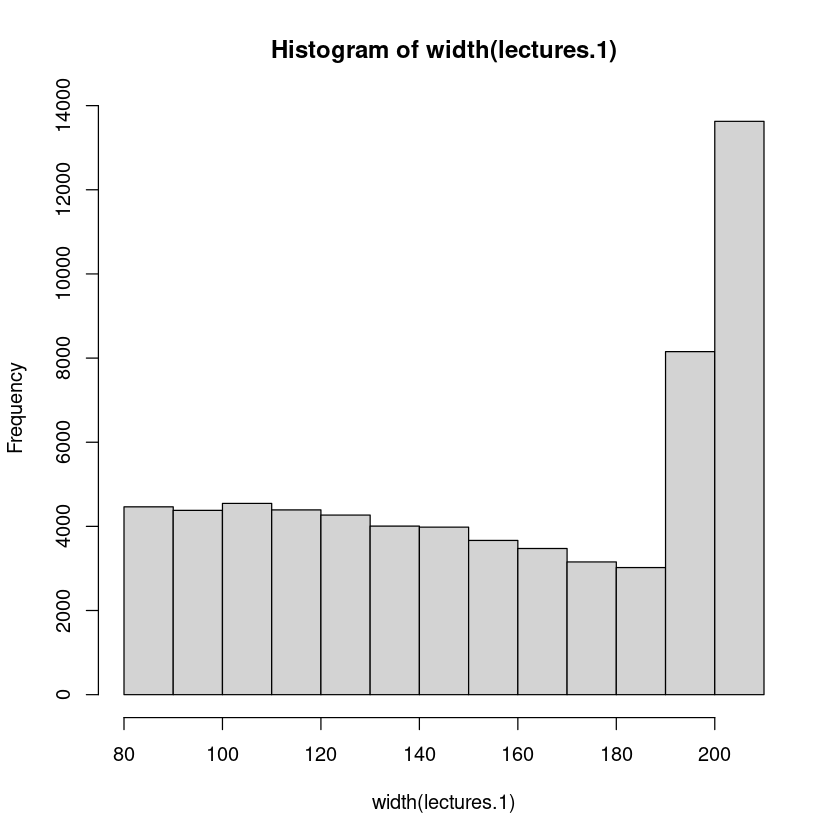

In [10]:
# I per fer un histograma, podem utilitzar la funció hist():
hist(width(lectures.1))

Intenta usar la funció `mean()` per calcular la longitud mitjana de les seqüències de cada arxiu.

L'anàlisi de qualitat de les seqüències obtingudes d'un experiment de seqüenciació és un pas fonamental, en el qual s'han d'eliminar les seqüències de baixa qualitat, o retallar-se, si en algun extrem la seqüenciació ha produït resultats pobres.

## Mapatge de lectures curtes
El pas següent és normalment identificar la posició d'origen, en un genoma de referència, de totes les seqüències curtes obtingudes per seqüenciació. Existeixen molts programes disponibles per fer-ho. En l'entorn d'R, podem utilitzar una implementació de Bowtie-2, anomenada *Rbowtie2*, creada per Zheng Wei i Wei Zhang, i disponible en [Bioconductor](https://bioconductor.org/packages/release/bioc/html/Rbowtie2.html) sota llicència *GPL (>= 3)*.

El genoma de referència és el del SARS-CoV-2, i es troba en l'arxiu `data/referencia.fna`. Aquestes són les seues primeres línies.

    >NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
    ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
    CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
    TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
    TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
    CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
    GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
    CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT

Reconeixes el format? Abans de mapar o alinear les seqüències curtes al genoma de referència és necessari preparar (de fet, *indexar*) el genoma de referència. L'índex es composarà d'uns pocs arxius, amb el mateix nom i terminacions diferents. Per tenir els arxius ordenats, crearem una carpeta on guardar l'índex.

In [23]:
suppressMessages(library(Rbowtie2))
dir.create('index')

# Observa com podem utilitzar més d'una línia per escriure una ordre més clara:
build_output <- bowtie2_build(references = 'data/referencia.fna',
                              bt2Index = 'index/SARS-Cov2',
                              '--quiet',
                              overwrite = TRUE)

# En aquesta variable hem guardat els missatges d'eixida del procés. Vegem si hi
# ha cap error:
build_output

Warning message in dir.create("index"):
“'index' already exists”
Warning message in checkFileCreatable(paste0(bt2Index, ".1.bt2"), "bt2Index", overwrite):
“For argument bt2Index, file exist: index/SARS-Cov2.1.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".2.bt2"), "bt2Index", overwrite):
“For argument bt2Index, file exist: index/SARS-Cov2.2.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".3.bt2"), "bt2Index", overwrite):
“For argument bt2Index, file exist: index/SARS-Cov2.3.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".4.bt2"), "bt2Index", overwrite):
“For argument bt2Index, file exist: index/SARS-Cov2.4.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".rev.1.bt2"), "bt2Index", :
“For argument bt2Index, file exist: index/SARS-Cov2.rev.1.bt2. It will be overwrited”
Warning message in checkFileCreatable(paste0(bt2Index, ".rev.2.bt2"), "bt2Ind

character(0)

La construcció de l'índex del genoma de referència accepta moltes opcions. Les úniques que són imprescindibles són la *direcció* de l'arxiu **fasta** amb la seqüència del genoma de referència i el nom base que volem donar als arxius de l'índex. Comprova que l'índex ha sigut creat en la carpeta designada. Els arxius que el composen no són arxius de text.

Ara podem mapar les seqüències curtes al genoma del coronavirus SARS-Cov-2. Si has donat un nom diferent a la carpeta de l'índex, no oblides canviar-lo ací també. També pots triar el nom de l'arxiu on es guardaran els resultats del mapatge en format SAM:

In [24]:
mapeo_output <- bowtie2(bt2Index = 'index/SARS-Cov2',
                        samOutput = 'ERR4423464.sam',
                        seq1 = 'data/ERR4423464_1.fastq',
                        seq2 = 'data/ERR4423464_2.fastq',
                        overwrite = TRUE)
mapeo_output

arguments 'show.output.on.console', 'minimized' and 'invisible' are for Windows only



[1] "65135 reads; of these:"                                                
 [2] "  65135 (100.00%) were paired; of these:"                              
 [3] "    2477 (3.80%) aligned concordantly 0 times"                         
 [4] "    62658 (96.20%) aligned concordantly exactly 1 time"                
 [5] "    0 (0.00%) aligned concordantly >1 times"                           
 [6] "    ----"                                                              
 [7] "    2477 pairs aligned concordantly 0 times; of these:"                
 [8] "      714 (28.83%) aligned discordantly 1 time"                        
 [9] "    ----"                                                              
[10] "    1763 pairs aligned 0 times concordantly or discordantly; of these:"
[11] "      3526 mates make up the pairs; of these:"                         
[12] "        3258 (92.40%) aligned 0 times"                                 
[13] "        268 (7.60%) aligned exactly 1 time"                            
[14] "        0 (0.00%) aligned >1 times"                                    
[15] "97.50% overall alignment rate"

Dedica un temps a llegir el missatge d'eixida del mapatge. Et sembla un resultat satisfactori? Pots interpretar tota la informació?

L'arxiu d'eixida, `ERR4423464.sam`, sí és un arxiu de text en format **SAM**, que pots obrir per explorar-lo. Observaràs que les línies són més llargues que l'espai disponible en la pantalla, la qual cosa dificulta reconéixer el format. Per identificar millor les columnes, pots utilitzar el comandament següent en una *shell* de Unix:

    less -S ERR4423464.sam

Visita [aquest enllaç](https://en.wikipedia.org/wiki/SAM_(file_format)) o bé la [publicació original](https://academic.oup.com/bioinformatics/article/25/16/2078/204688) on es descriu el format. De totes maneres, és més pràctic (i ocupa menys) la versió *binària* del format **SAM**, anomenada **BAM**. Anem a crear una versió *bam* dels nostres alineaments per utilitzar-la en el pròxim pas:

In [25]:
suppressMessages(library(Rsamtools))
asBam('ERR4423464.sam', destination='ERR4423464', overwrite = TRUE)

# Açò ens ofereix un resum dels tipus d'alineaments continguts a l'arxiu:
quickBamFlagSummary('ERR4423464.bam')

[1] "ERR4423464.bam"

                                group |    nb of |    nb of | mean / max
                                   of |  records |   unique | records per
                              records | in group |   QNAMEs | unique QNAME
All records........................ A |   130270 |    65135 |    2 / 2
  o template has single segment.... S |        0 |        0 |   NA / NA
  o template has multiple segments. M |   130270 |    65135 |    2 / 2
      - first segment.............. F |    65135 |    65135 |    1 / 1
      - last segment............... L |    65135 |    65135 |    1 / 1
      - other segment.............. O |        0 |        0 |   NA / NA

Note that (S, M) is a partitioning of A, and (F, L, O) is a partitioning of M.
Indentation reflects this.

Details for group M:
  o record is mapped.............. M1 |   127012 |    63640 |    2 / 2
      - primary alignment......... M2 |   127012 |    63640 |    2 / 2
      - secondary alignment....... M3 |        0 |        0 |   NA / NA
  o rec

El format **SAM** conté molta informació, però no ens ofereix una visió panoràmica al llarg del genoma de referència. iPer poder visualitzar la distribució de les seqüències curtes al llarg del genoma de referència necessitem *amuntegar-les*. La funció `pileup()` permet comptar quantes vegades ha sigut *llegida* cada posició (és a dir, la seua **cobertura**), a més de poder registrar quins nucleòtids diferents s'han trobat en cada posició i amb quina freqüència cada un, entre altres coses. Nota, al codi següent, que podem triar la qualitat mínima d'una base llegida per tal de comptar-la en la seua cobertura:

In [26]:
cobertura <- pileup('ERR4423464.bam',
                    pileupParam = PileupParam(max_depth = 10000,
                                              min_base_quality = 13,
                                              min_mapq = 13,
                                              min_nucleotide_depth = 1,
                                              min_minor_allele_depth = 0,
                                              distinguish_strands = FALSE,
                                              distinguish_nucleotides = FALSE))
head(cobertura)

,seqnames,pos,count
,<fct>,<int>,<int>
1,NC_045512.2,39,25
2,NC_045512.2,40,32
3,NC_045512.2,41,32
4,NC_045512.2,42,34
5,NC_045512.2,43,34
6,NC_045512.2,44,35


Abans de veure com varia la cobertura al llarg del genoma en este experiment de seqüenciació, considerem què cap esperar. Hem utilitzat 65.135 parells de seqüències curtes, la longitud mitjana de les quals era 154. Aproximadament, esperaríem unes $65.135 \times 2 \times 154 = 20.061.580$ bases seqüenciades. Com que el genoma del coronavirus SARS-Cov-2 té unes 30000 bases, en principi tenim suficients seqüències curtes com per cobrir el genoma de referència $20.061.580 / 30000 = 668,72 vegades. A la gràfica que generarem a continuació, la línia roja marcarà la cobertura mitjana obtinguda (676) i la blava, la mediana.

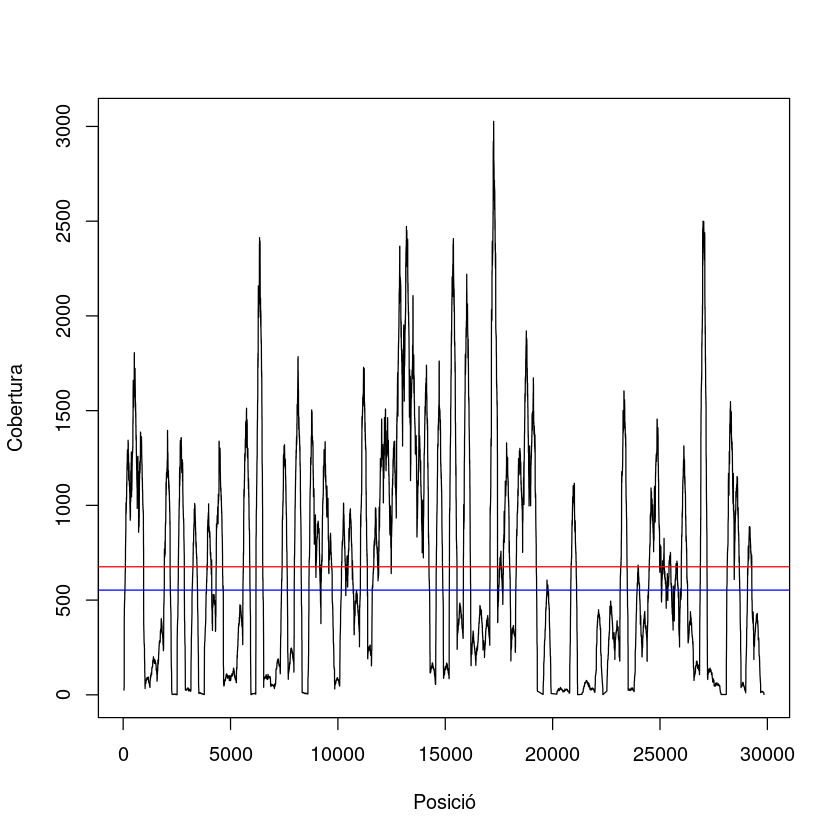

In [27]:
# Els dos primers arguments de la funció plot() són les coordenades.
# 
plot(cobertura$pos, cobertura$count, type = 'l',
     xlab = 'Posició', ylab = 'Cobertura')
abline(h = mean(cobertura$count),   col = 'red')
abline(h = median(cobertura$count), col = 'blue')

Si la seqüenciació haguera sigut realment aleatòria, de manera que totes les posicions tingueren la mateixa probabilitat de ser seqüenciades, la cobertura seguiria una distribució de Poisson, on la mitjana és igual a la variància. En este cas, la variància (calcula-la amb `var(cobertura$count)`), és molt major que la mitjana. Quin motiu se t'ocorre que podria haver provocat que algunes posicions hagen sigut seqüenciades tant més que altres?

## Detecció de variants

L'objectiu de molts projectes de seqüenciació és detectar i analitzar les posicions (i fragments) variables: aquelles on no tots els individus seqüenciats tenen la mateixa informació genètica. Un tipus bàsic de variació són les mutacions puntuals o els SNPs. Diferenciar les posicions variables de les que no ho són és un problema de classificació que pot resultar difícil, perquè les seqüències curtes inclouen alguns **errors de seqüenciació**.

Fora de l'entorn d'R, existeixen molts programes per detecgtar variants. [GATK](https://gatk.broadinstitute.org/hc/en-us), desenvolupat pel Broad Institute, és una de les eines més populars per detectar variants a gran escala. Es distribueix com a programari lliure, sota llicència BSD modificada de 3 clàusules. Un altre programa interessant és [Freebayes](https://github.com/freebayes/freebayes) d'Erik Garrisson i altres, distribuït sota llicència MIT.

Sense entrar en els detalls del procés, l'exemple bàsic següent ens dóna una idea dels pasos a seguir en R i ens permetrà observar el format **VCF** dels resultats. Anem a utilitzar els paquets [VariantTools](https://bioconductor.org/packages/release/bioc/html/VariantTools.html) i [gmapR](https://bioconductor.org/packages/release/bioc/html/gmapR.html).

El primer pas és indexar de nou el genoma de referència. El paquet `gmapR` és independent de `Rbowtie2` i no utilitza el mateix tipus d'índex. La funció `GmapGenome()` pot crear un índex a partir d'un arxiu **fasta**, sempre que se li indique la direcció (o *path*) d'eixe arxiu de la manera adequada. Així doncs, abans de crear l'índex, cal crear la variable que indica on es troba la seqüència del genoma de referència en format **fasta**.

In [16]:
suppressMessages(library('VariantTools'))
suppressMessages(library('gmapR'))

# Creem un objecte 'FastaFile' a partir de l'arxiu data/referencia.fna
referencia.fasta  <- rtracklayer::FastaFile(
    paste(getwd(), 'data/referencia.fna', sep = '/'))

In [17]:
# Ací s'indexa el genoma de referència.
referencia.genoma <- GmapGenome(referencia.fasta, create = TRUE)

NOTE: genome 'referencia' already exists, not overwriting



Esta expressió haurà generat un error. Llig-lo i intenta desxifrar-ne el significat. Davant situacions així, és recomanable buscar en internet el text o les paraules clau de l'error. En aquest cas, el problema és que la màquina virtual on s'executen aquestes ordres no disposa de suficient memòia RAM per generar els arxius de l'índex. Per solucionar-ho, utilitzarem un índex ja creat i contingut a l'arxiu `data/gmap.tar.gz`. Abans d'utilitzar-lo cal *desempaquetar-lo*.

In [ ]:
untar('data/gmap.tar.gz')

I ara podem informar la funció `GmapGenome()` de la ubicació de l'índex que acabem de desempaquetar. Observaràs que la forma de fer-ho és una mica complicada, perquè a l'argument  `directory` se li assigna el resultat de combinar tres funcions diferents:

In [ ]:
referencia.genoma <- GmapGenome(genome = 'referencia',
                               directory = GmapGenomeDirectory(file.path(getwd(),'gmap')))

Ara sí que tenim el genoma de referència en el format adequat i estem en condicions d'utilitzar-lo, junt amb els alineaments de l'arxiu `ERR4423464.bam` per detectar variants.

La funció `TallyVariantsParam()` permet ajustar alguns paràmetres que afecten la sensibilitat i l'especificitat del procés de detecció de variants. Pots esbrinar quins paràmetres són aquests llegint l'ajuda de la funció: `help(TallyVariantsParam)`. Si no especifiquem cap més paràmetre que el genoma de referència, s'apliquen els valors per defecte de la resta de paràmetres.

In [18]:
parametres <- TallyVariantsParam(referencia.genoma)

Normalment es detecten variants entre un conjunt de mostres o individus seqüenciats. En aquest exercici estem utilitzant només una mostra, representada per l'arxiu `ERR4423464.bam`. Ací, les *variants* que busquem són diferències entre el genoma seqüenciat i el de referència. 

In [19]:
preliminar <- callVariants('ERR4423464.bam', parametres)
summary(preliminar)

[1] "VRanges object with 40 ranges and 17 metadata columns"

Les posicions variables estan indicades com a *rangs*, perquè podrien abastar més d'un nucleòtid. Sempre poden haver **falsos positius** entre els resultats d'un procés de detecció de variants. El pas següent consisteix en filtrar els resultats, per tal de quedar-nos únicament amb les variants més probablement vertaderes.

In [20]:
filtrades  <- postFilterVariants(preliminar)
summary(filtrades)

[1] "VRanges object with 34 ranges and 17 metadata columns"

Quantes posicions variables hem trobat? Aconsegueixes extraure i interpretar la informació continguda en l'objecte `filtrades`? Existeixen moltes funcions per treballar amb aquesta classe d'objecte, però aprendre-les no és el nostre objectiu ara. Potser el més fàcil i pràctic siga guardar la informació sobre les variants filtrades en un arxiu de text amb format **VCF**.

El format **VCF** necessita els noms de les mostres (en el nostre cas només una), que normalment coincideixen amb els noms dels arxius `.bam`. Com esta informació no està encara continguda en l'objecte `filtrades`, la introduïm ara:

In [21]:
sampleNames(filtrades) <- 'ERR4423464'

I finalment, creem l'arxiu **VCF**:

In [22]:
writeVcf(filtrades, filename = 'ERR4423464.vcf')

Warning message in .Call(.make_vcf_geno, filename, fixed, names(geno), as.list(geno), :
“converting NULL pointer to R NULL”


El format **VCF** està descrit en [aquet document](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwicz7ih05zuAhUHExoKHQB-DY8QFjAIegQIARAC&url=https%3A%2F%2Fsamtools.github.io%2Fhts-specs%2FVCFv4.2.pdf&usg=AOvVaw3UrlHdXnBVzm0df9OE90Rm). En obrir l'arxiu `ERR4423464.vcf` amb un editor de text, normalment les línies més llargues que la pantalla acaben ocupant més d'una línia, la qual cosa difivulta la identificació del format. Per poder observar millor el format és recomanable obrir-lo, per exemple, des d'una terminal (o *shell*) amb el comandament:

    less -S ERR4423464.vcf